## Tarea 3: Análisis y predicción de texto
## Diana Claudia Maya Santes
### Maestria Ciencia de Datos
### Universidad Autónoma de Nuevo León

In [3]:
import numpy as np 
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import re
import unicodedata
#from wordcloud import WordCloud
from nltk.corpus import stopwords

In [61]:
#IMDB Movie Reviews
#https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data?select=IMDB+Dataset.csv

reviews = pd.read_csv('IMDB Dataset.csv', encoding='latin1')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
reviews['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

## Limpieza

In [63]:
#definimos una funcion que nos ayudara a quitar espacios adicionales, normalizar 
# hacer en minusculas todo el texto, quitar signos 
def limpiar_texto(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res

In [64]:
reviews['texto_limpio'] = reviews['review'].map(limpiar_texto)

## definimos para remover stopwords

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
# definimos para remover stopwords
sw = nltk.corpus.stopwords.words('english')
spw1=sw + ['br', 'br ',' br', ' br ', 'u']

In [67]:
#reviews_2=reviews['texto_limpio']
reviews

,review,sentiment,texto_limpio
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,i m going to have to disagree with the previou...


In [68]:
#quitamos stopwords
reviews['texto_limpio'] = reviews['texto_limpio'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spw1)]))


In [69]:
reviews['texto_limpio'][2]
#'br' in spw1


'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends'

## Tokenización 

In [70]:
#reviews
#Separamos por palabra en cada fila
#reviews['texto_limpio'][1].split() 
#usamos una comprehension list
reviews['texto_limpio']=reviews['texto_limpio'].map(lambda x:x.split(" "))

In [71]:
reviews

,review,sentiment,texto_limpio
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, creative, o..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,"[going, disagree, previous, comment, side, mal..."


## Lematización

In [72]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
from nltk.stem import WordNetLemmatizer 
import re

In [74]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

reviews['texto_limpio'] = reviews['texto_limpio'].apply(lambda x: lemmatizer(x))
reviews.head()

,review,sentiment,texto_limpio
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewer, mentioned, watching, oz, episo..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, family, little, boy, jake, think, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ..."


## Steaming

In [75]:
ps = PorterStemmer()
def Steamm(text):
    text = [ps.stem(word) for word in text]
    return text

reviews['texto_limpio'] = reviews['texto_limpio'].apply(lambda x: Steamm(x))
reviews.head()

,review,sentiment,texto_limpio
0,One of the other reviewers has mentioned that ...,positive,"[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visual, st..."


## nube de palabras

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import itertools

In [61]:
spw1=sw+['br','br']

In [38]:
Mov_rev=list(itertools.chain.from_iterable(reviews['texto_limpio']))

In [ ]:
Mov_rev=[]
[Mov_rev.extend(reviews['texto_limpio'][i]) for i in range(len(reviews))]

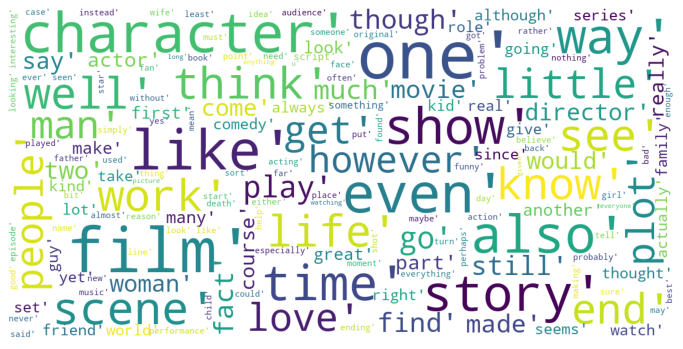

In [97]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=spw1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Mov_rev)

In [102]:
from matplotlib.pyplot import figure

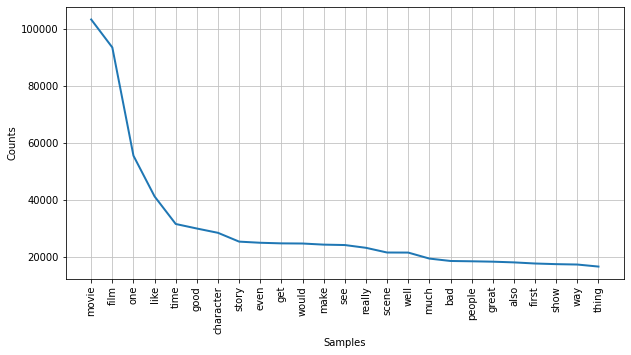

In [103]:
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(Mov_rev)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

#  Tarea 2

In [76]:
reviews_2 = pd.read_csv('IMDB Dataset.csv', encoding='latin1')

In [77]:
reviews_2.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [79]:
def limpiar_tokenizar(texto):    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

In [82]:
reviews_2['texto_tokenizado'] = reviews_2['review'].apply(lambda x: limpiar_tokenizar(x))

In [84]:
reviews_2[['review', 'texto_tokenizado']].head()

,review,texto_tokenizado
0,One of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,"[wonderful, little, production, br, br, the, f..."
2,I thought this was a wonderful way to spend ti...,"[thought, this, was, wonderful, way, to, spend..."
3,Basically there's a family where a little boy ...,"[basically, there, family, where, little, boy,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, mattei, love, in, the, time, of, mone..."


In [86]:
reviews_tidy = reviews_2.explode(column='texto_tokenizado')
reviews_tidy = reviews_tidy.drop(columns='review')
reviews_tidy = reviews_tidy.rename(columns={'texto_tokenizado':'token'})
reviews_tidy.head(3)

,sentiment,token
0,positive,one
0,positive,of
0,positive,the


In [87]:
## numero de palabras
reviews_tidy['token'].count()

11180308

In [88]:
reviews_tidy['token'].nuniqueique()

101743

In [96]:
nltk.download('stopwords')
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
reviews_tidy = reviews_tidy[~(reviews_tidy["token"].isin(stop_words))]

In [105]:
reviews_tidy=reviews_tidy[reviews_tidy['token']!='br'][['sentiment','token']]

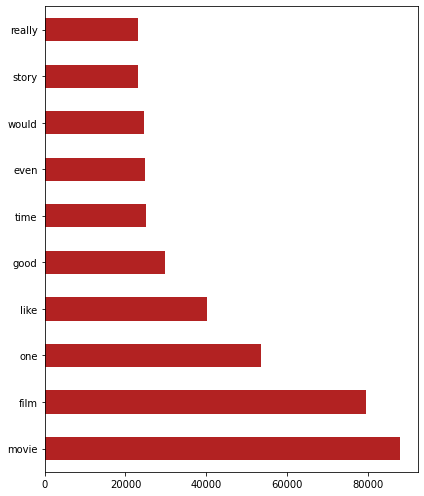

In [107]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(6, 7))
df_temp = reviews_tidy
counts  = df_temp['token'].value_counts(ascending=False).head(10)
counts.plot(kind='barh', color='firebrick')
fig.tight_layout()

In [115]:
#reviews_2
reviews_2['texto_tokenizado']=[" ".join(x) for x in reviews_2['texto_tokenizado']]

,review,sentiment,texto_tokenizado
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br the filming ...
2,I thought this was a wonderful way to spend ti...,positive,thought this was wonderful way to spend time o...
3,Basically there's a family where a little boy ...,negative,basically there family where little boy jake t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love in the time of money is vis...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought this movie did down right good job it ...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,am catholic taught in parochial elementary sch...
49998,I'm going to have to disagree with the previou...,negative,going to have to disagree with the previous co...


In [109]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [117]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

reviews_2['POS tagged'] = reviews_2['texto_tokenizado'].apply(token_stop_pos)


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [118]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
reviews_2['Lemma'] = reviews_2['POS tagged'].apply(lemmatize)
reviews_2.head()

,review,sentiment,texto_tokenizado,POS tagged,Lemma
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[(one, None), (reviewers, n), (mentioned, v), ...",one reviewer mention watch oz episode hook r...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br the filming ...,"[(wonderful, a), (little, a), (production, n),...",wonderful little production br br filming te...
2,I thought this was a wonderful way to spend ti...,positive,thought this was wonderful way to spend time o...,"[(thought, n), (wonderful, a), (way, n), (spen...",thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,basically there family where little boy jake t...,"[(basically, r), (family, n), (little, a), (bo...",basically family little boy jake think zombi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love in the time of money is vis...,"[(petter, n), (mattei, n), (love, n), (time, n...",petter mattei love time money visually stunn...


In [4]:
#reviews_2.to_csv('tagged.csv', index=False)
tagged = pd.read_csv('C:/Users/Diana/Documents/Maestria CD/Materias/Proc_Clasificacion/Tarea 2/tagged.csv', encoding='latin1')

In [17]:
tagged
#tagged[['revie','Lemma']]

,review,sentiment,texto_tokenizado,POS tagged,Lemma
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[('one', None), ('reviewers', 'n'), ('mentione...",one reviewer mention watch oz episode hook r...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br the filming ...,"[('wonderful', 'a'), ('little', 'a'), ('produc...",wonderful little production br br filming te...
2,I thought this was a wonderful way to spend ti...,positive,thought this was wonderful way to spend time o...,"[('thought', 'n'), ('wonderful', 'a'), ('way',...",thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,basically there family where little boy jake t...,"[('basically', 'r'), ('family', 'n'), ('little...",basically family little boy jake think zombi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love in the time of money is vis...,"[('petter', 'n'), ('mattei', 'n'), ('love', 'n...",petter mattei love time money visually stunn...
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought this movie did down right good job it ...,"[('thought', 'n'), ('movie', 'n'), ('right', '...",thought movie right good job creative origin...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"[('bad', 'a'), ('plot', 'n'), ('bad', 'a'), ('...",bad plot bad dialogue bad act idiotic direct...
49997,I am a Catholic taught in parochial elementary...,negative,am catholic taught in parochial elementary sch...,"[('catholic', 'a'), ('taught', 'n'), ('parochi...",catholic taught parochial elementary school ...
49998,I'm going to have to disagree with the previou...,negative,going to have to disagree with the previous co...,"[('going', 'v'), ('disagree', 'v'), ('previous...",go disagree previous comment side maltin one...


## Analisis de sentimiento usando TextBlob

In [6]:
from textblob import TextBlob

In [7]:
# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity
# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
fin_data = pd.DataFrame(tagged[['review', 'Lemma']])

In [9]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis
0,One of the other reviewers has mentioned that ...,one reviewer mention watch oz episode hook r...,0.040548,Positive
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming te...,0.125980,Positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer ...,0.381513,Positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombi...,-0.004167,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunn...,0.229516,Positive


In [10]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    37076
Negative    12880
Neutral        44
Name: Analysis, dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x24496421160>,
 [Text(-0.7568222703907437, 0.7982606410443898, 'Positive'),
  Text(0.7546125009241671, -0.8003499068838417, 'Negative'),
  Text(1.3499948408939786, -0.003732232527768241, 'Neutral')],
 [Text(-0.41281214748586015, 0.43541489511512166, '74.2%'),
  Text(0.41160681868590926, -0.4365544946639136, '25.8%'),
  Text(0.8499967516739865, -0.0023499241841503735, '0.1%')])

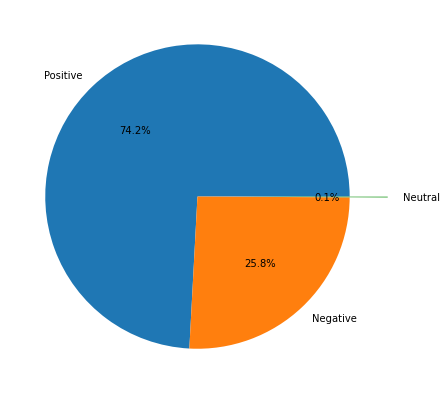

In [12]:
tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## Analisis de sentimiento usando VADER

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [15]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,One of the other reviewers has mentioned that ...,one reviewer mention watch oz episode hook r...,0.040548,Positive,-0.9916,Negative
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming te...,0.125980,Positive,0.9589,Positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer ...,0.381513,Positive,0.9647,Positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombi...,-0.004167,Negative,-0.8805,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunn...,0.229516,Positive,0.9860,Positive


In [16]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    31738
Negative    11993
Neutral      6269
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x244966eb1c0>,
 [Text(-0.49299254795924885, 1.0940559161471812, 'Positive'),
  Text(0.03241040882329386, -1.099522426055925, 'Negative'),
  Text(1.0157642740872705, -0.42216458815011987, 'Neutral')],
 [Text(-0.2875789863095618, 0.6381992844191889, '63.5%'),
  Text(0.01767840481270574, -0.5997395051214136, '24.0%'),
  Text(0.5540532404112385, -0.23027159353642898, '12.5%')])

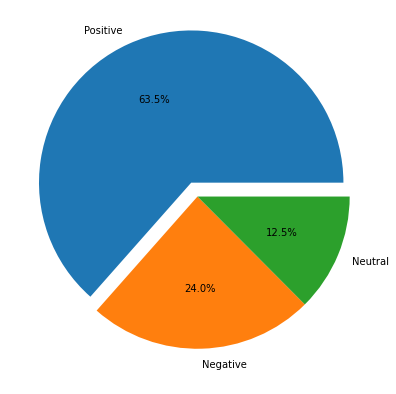

In [17]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

## Analisis using SentiWordNet

In [18]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [19]:
import ast

In [20]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet

In [21]:
tagged['POS tagged']=tagged['POS tagged'].apply(ast.literal_eval)

In [22]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = tagged['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()


,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,One of the other reviewers has mentioned that ...,one reviewer mention watch oz episode hook r...,0.040548,Positive,-0.9916,Negative,Negative
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming te...,0.125980,Positive,0.9589,Positive,Positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer ...,0.381513,Positive,0.9647,Positive,Positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombi...,-0.004167,Negative,-0.8805,Negative,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunn...,0.229516,Positive,0.9860,Positive,Positive


In [23]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    35612
Negative    13577
Neutral       811
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x2451104e130>,
 [Text(-0.7421426847232572, 0.9429868692149198, 'Positive'),
  Text(0.6353862458109774, -0.8979333597958327, 'Negative'),
  Text(1.098572179115123, -0.056028272097668586, 'Neutral')],
 [Text(-0.43291656608856666, 0.5500756737087031, '71.2%'),
  Text(0.34657431589689675, -0.4897818326159087, '27.2%'),
  Text(0.5992211886082488, -0.030560875689637407, '1.6%')])

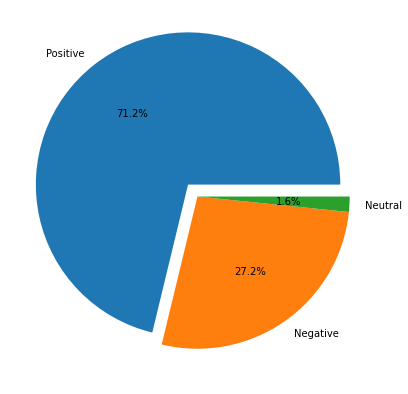

In [24]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x24511134e20>,
 [Text(-0.680297460996319, 0.8644046301136765, 'Positive'),
  Text(0.6353862458109774, -0.8979333597958327, 'Negative'),
  Text(1.34824767436856, -0.06876197030168417, 'Neutral')],
 [Text(-0.37107134236162853, 0.47149343460745985, '71.2%'),
  Text(0.34657431589689675, -0.4897818326159087, '27.2%'),
  Text(0.8488966838616858, -0.043294573893652995, '1.6%')])

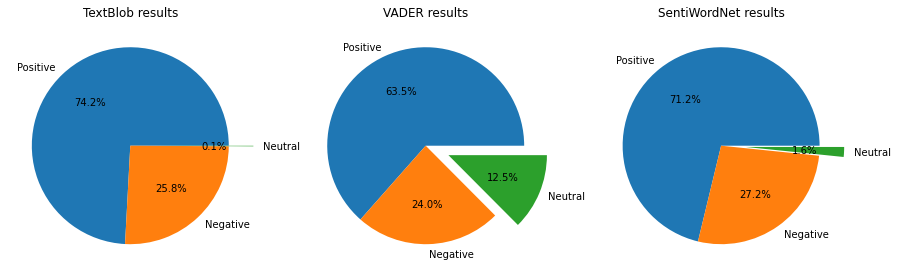

In [26]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Tarea 3 Análisis y predicción de texto

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [81]:
from time import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.utils.extmath import density

In [62]:
# dividimos el conjunto de datos en los de entrenamiento y prueba
X=fin_data['review'].copy()
y=fin_data['Analysis'].copy()

In [63]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)

In [75]:
## transformamos los datos
count_vect = CountVectorizer(ngram_range=(1,3),max_features=30)
Xt_count = count_vect.fit_transform(Xt)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(Xt_count)
#clf = MultinomialNB().fit(X_train_tfidf, yt)

In [76]:
Xv_count = count_vect.fit_transform(Xv)
tfidf_transformer = TfidfTransformer()
X_validate_tfidf = tfidf_transformer.fit_transform(Xv_count)

In [77]:
X_train_tfidf.shape

(35000, 30)

In [78]:
X_validate_tfidf.shape

(15000, 30)

In [90]:
def benchmark(clf):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train_tfidf, yt)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
    
    # para el entrenamiento
    t0 = time()
    train = clf.predict(X_train_tfidf)
    print(train)
    test_time = time() - t0
    print("train time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(yt, train)
    print("accuracy train:   %0.3f" % score)

    if hasattr(clf, "coef_"):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

    print("classification report:")
    print(metrics.classification_report(yt, train))

    print("confusion matrix:")
    print(metrics.confusion_matrix(yt, train))

    print()
    clf_descr = str(clf).split("(")[0]
     
# para la prediccion
    print('Predicción')
    t0 = time()
    pred = clf.predict(X_validate_tfidf)
    print(pred)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(yv, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, "coef_"):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

    print("classification report:")
    print(metrics.classification_report(yv, pred))

    print("confusion matrix:")
    print(metrics.confusion_matrix(yv, pred))

    print()
    clf_descr = str(clf).split("(")[0]
    
    return clf_descr, score, train_time, test_time

In [93]:
results = []
for clf, name in (
    (RidgeClassifier(max_iter=50, tol=1e-3, solver="sag"), "Ridge Classifier"),
    (Perceptron(max_iter=50), "Perceptron"),
    (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
    (KNeighborsClassifier(n_neighbors=10, weights='distance'), "kNN"),
    (RandomForestClassifier(n_estimators=50, max_depth=15), "Random forest"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print("=" * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty=penalty)))

# Train SGD with Elastic Net penalty
print("=" * 80)
print("Elastic-Net penalty")
results.append(
    benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet")))

# Train NearestCentroid without threshold
print("=" * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print("=" * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=0.01)))
results.append(benchmark(BernoulliNB(alpha=0.01)))
results.append(benchmark(ComplementNB(alpha=0.1)))

print("=" * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(
    benchmark(Pipeline([("feature_selection",SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3)),),
                ("classification", LinearSVC(penalty="l2")),])))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(max_iter=50, solver='sag')
train time: 0.133s
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
train time:  0.005s
accuracy train:   0.742
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.48      0.01      0.02      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.74      1.00      0.85     25967

    accuracy                           0.74     35000
   macro avg       0.41      0.34      0.29     35000
weighted avg       0.68      0.74      0.64     35000

confusion matrix:
[[   92     0  8910]
 [    0     0    31]
 [   98     0 25869]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.004s
accuracy:   0.739
dimensionality: 30
density: 1.000000
classification report:
              precision    recall  f1-score   support

    Negative       0.45      0.03      0.05      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.74      0.99      0.85     11109

    accuracy                           0.74     15000
   macro avg       0.40      0.34      0.30     15000
weighted avg       0.67      0

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.37      0.14      0.20      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.75      0.92      0.83     25967

    accuracy                           0.72     35000
   macro avg       0.38      0.35      0.34     35000
weighted avg       0.66      0.72      0.67     35000

confusion matrix:
[[ 1250     0  7752]
 [    4     0    27]
 [ 2080     0 23887]]

Predicción
['Positive' 'Positive' 'Negative' ... 'Negative' 'Positive' 'Positive']
test time:  0.002s
accuracy:   0.640
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.30      0.29      0.30      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.75      0.76      0.76     11109

    accuracy                           0.64     15000
   macro avg       0.35      0.35      0.35     15000
weighted avg       0.64      0.64      0.64     15000

confusion matrix:
[[1138    0 2740]
 [   5    0    8]
 [2643    0 8466]]

kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10, weights='distance')
train time: 0.021s
['Negative' 'Negative' 'Positive' ... 'Negative' 'Negative' 'Positive']
train time:  54.173s
accuracy train:   1.000
classification report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      9002
     Neutral       1.00      1.00      1.00        31
    Positive       1.00      1.00      1.00     25967

    accuracy   

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.32      0.13      0.18      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.75      0.90      0.82     11109

    accuracy                           0.70     15000
   macro avg       0.36      0.34      0.33     15000
weighted avg       0.64      0.70      0.65     15000

confusion matrix:
[[  500     0  3378]
 [    3     0    10]
 [ 1063     0 10046]]

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(max_depth=15, n_estimators=50)
train time: 16.764s
['Negative' 'Negative' 'Positive' ... 'Positive' 'Negative' 'Positive']
train time:  0.268s
accuracy train:   0.876
classification report:
              precision    recall  f1-score   support

    Negative       1.00      0.52      0.69      9002
     Neutral       1.00      0.16      0.28        31
    Positive       0.86      1.00      0.92     25967


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo



L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(dual=False, tol=0.001)
train time: 0.156s
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
train time:  0.004s
accuracy train:   0.742
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.49      0.01      0.02      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.74      1.00      0.85     25967

    accuracy                           0.74     35000
   macro avg       0.41      0.34      0.29     35000
weighted avg       0.68      0.74      0.64     35000

confusion matrix:
[[   93     0  8909]
 [    0     0    31]
 [   98     0 25869]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.002s
accuracy:   0.739
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.45      0.03      0.05      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.74      0.99      0.85     11109

    accuracy                           0.74     15000
   macro avg       0.40      0.34      0.30     15000
weighted avg       0.67      0.74      0.64     15000

confusion matrix:
[[  106     0  3772]
 [    2     0    11]
 [  125     0 10984]]

________________________________________________________________________________
Training: 
SGDClassifier(max_iter=50)
train time: 0.119s
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
train time:  0.003s
accuracy train:   0.742
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.74      1.00      0.85     25967

    accuracy                           0.74     35000
   macro avg       0.25      0.33      0.28     35000
weighted avg       0.55      0.74      0.63     35000

confusion matrix:
[[    0     0  9002]
 [    0     0    31]
 [    0     0 25967]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.002s
accuracy:   0.741
dimensionality: 30
density: 1.000000
classification report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.74      1.00      0.85     11109

    accuracy                           0.74     15000
   macro avg       0.25      0.33      0.28     15000
weighted avg       0.55      0

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train time: 5.075s
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
train time:  0.004s
accuracy train:   0.742
dimensionality: 30
density: 0.922222
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.48      0.01      0.02      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.74      1.00      0.85     25967

    accuracy                           0.74     35000
   macro avg       0.41      0.34      0.29     35000
weighted avg       0.68      0.74      0.64     35000

confusion matrix:
[[   91     0  8911]
 [    0     0    31]
 [   98     0 25869]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.002s
accuracy:   0.739
dimensionality: 30
density: 0.922222
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.45      0.03      0.05      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.74      0.99      0.85     11109

    accuracy                           0.74     15000
   macro avg       0.40      0.34      0.30     15000
weighted avg       0.67      0.74      0.64     15000

confusion matrix:
[[  106     0  3772]
 [    2     0    11]
 [  126     0 10983]]

________________________________________________________________________________
Training: 
SGDClassifier(max_iter=50, penalty='l1')
train time: 0.217s
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
train time:  0.004s
accuracy train:   0.742
dimensionality: 30
density: 0.422222
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.74      1.00      0.85     25967

    accuracy                           0.74     35000
   macro avg       0.25      0.33      0.28     35000
weighted avg       0.55      0.74      0.63     35000

confusion matrix:
[[    0     0  9002]
 [    0     0    31]
 [    0     0 25967]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.003s
accuracy:   0.741
dimensionality: 30
density: 0.422222
classification report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.74      1.00      0.85     11109

    accuracy                           0.74     15000
   macro avg       0.25      0.33      0.28     15000
weighted avg       0.55      0

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.74      1.00      0.85     25967

    accuracy                           0.74     35000
   macro avg       0.25      0.33      0.28     35000
weighted avg       0.55      0.74      0.63     35000

confusion matrix:
[[    0     0  9002]
 [    0     0    31]
 [    0     0 25967]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.002s
accuracy:   0.741
dimensionality: 30
density: 0.477778
classification report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.74      1.00      0.85     11109

    accuracy                           0.74     15000
   macro avg       0.25      0.33      0.28     15000
weighted avg       0.55      0

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\pytho

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.74      1.00      0.85     25967

    accuracy                           0.74     35000
   macro avg       0.25      0.33      0.28     35000
weighted avg       0.55      0.74      0.63     35000

confusion matrix:
[[    0     0  9002]
 [    0     0    31]
 [    0     0 25967]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.001s
accuracy:   0.741
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.74      1.00      0.85     11109

    accuracy                           0.74     15000
   macro avg       0.25      0.33      0.28     15000
weighted avg       0.55      0.74      0.63     15000

confusion matrix:
[[    0     0  3878]
 [    0     0    13]
 [    0     0 11109]]

________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01)
train time: 0.054s
['Positive' 'Negative' 'Positive' ... 'Positive' 'Positive' 'Positive']
train time:  0.009s
accuracy train:   0.698
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

    Negative       0.35      0.08      0.13      9002
     Neutral       0.01      0.48      0.02        31
    Positive       0.75      0.91      0.82     25967

    accuracy                           0.70     35000
   macro avg       0.37      0.49      0.32     35000
weighted avg       0.65      0.70      0.64     35000

confusion matrix:
[[  685   431  7886]
 [    4    15    12]
 [ 1244  1002 23721]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.004s
accuracy:   0.676
dimensionality: 30
density: 1.000000
classification report:
              precision    recall  f1-score   support

    Negative       0.32      0.13      0.18      3878
     Neutral       0.01      0.54      0.02        13
    Positive       0.75      0.87      0.80     11109

    accuracy                           0.68     15000
   macro avg       0.36      0.51      0.34     15000
weighted avg       0.64      0

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)



confusion matrix:
[[ 487  189 3202]
 [   2    7    4]
 [1024  442 9643]]

________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1)
train time: 0.050s
['Negative' 'Negative' 'Positive' ... 'Positive' 'Positive' 'Positive']
train time:  0.004s
accuracy train:   0.577
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\pytho

              precision    recall  f1-score   support

    Negative       0.32      0.57      0.41      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.80      0.58      0.67     25967

    accuracy                           0.58     35000
   macro avg       0.37      0.38      0.36     35000
weighted avg       0.67      0.58      0.60     35000

confusion matrix:
[[ 5159     0  3843]
 [   22     0     9]
 [10915     0 15052]]

Predicción
['Positive' 'Positive' 'Negative' ... 'Negative' 'Positive' 'Positive']
test time:  0.002s
accuracy:   0.491
dimensionality: 30
density: 1.000000
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.29      0.70      0.41      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.80      0.42      0.55     11109

    accuracy                           0.49     15000
   macro avg       0.36      0.37      0.32     15000
weighted avg       0.67      0.49      0.51     15000

confusion matrix:
[[2698    0 1180]
 [   8    0    5]
 [6440    0 4669]]

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual=False, penalty='l1',
                                                     tol=0.001))),
                ('classification', LinearSVC())])
train time: 5.064s
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
train time:  0.008s
accuracy train:   0.742
classification report:


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.49      0.01      0.02      9002
     Neutral       0.00      0.00      0.00        31
    Positive       0.74      1.00      0.85     25967

    accuracy                           0.74     35000
   macro avg       0.41      0.34      0.29     35000
weighted avg       0.68      0.74      0.64     35000

confusion matrix:
[[   94     0  8908]
 [    0     0    31]
 [   98     0 25869]]

Predicción
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
test time:  0.003s
accuracy:   0.739
classification report:
              precision    recall  f1-score   support

    Negative       0.45      0.03      0.05      3878
     Neutral       0.00      0.00      0.00        13
    Positive       0.74      0.99      0.85     11109

    accuracy                           0.74     15000
   macro avg       0.40      0.34      0.30     15000
weighted avg       0.67      0.74      0.64     15000

confusion ma

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo